In [225]:
import pandas as pd

#retrieve HTML table data 
url = 'https://www.basketball-reference.com/leagues/NBA_2019_per_game.html'
html = pd.read_html(url, header = 0)
df2019 = html[0]


In [226]:
#Data Cleaning

#removing/dropping the rows with "age"
raw = df2019.drop(df2019[df2019.Age == 'Age'].index)
raw.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,...,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,...,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,3,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,...,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,4,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,...,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9


In [227]:
raw.shape

(708, 30)

CHECK FOR MISSING VALUES

In [228]:
print(raw.isnull().sum())

Rk         0
Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        6
3P         0
3PA        0
3P%       47
2P         0
2PA        0
2P%       15
eFG%       6
FT         0
FTA        0
FT%       43
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64


REPLACE THE MISSING VALUES WITH 0

In [229]:
df = raw.fillna(0)

CHECK IF THE NULL VALUES ARE DEALT

In [230]:
print(df.isnull().sum())

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64


In [231]:
df = df.drop(['Rk'],axis=1)


Write this Data into CSV

In [232]:
df.to_csv('nba2019.csv',index=False)

In [233]:
ls

 Volume in drive D is Sandhya
 Volume Serial Number is B8AD-453C

 Directory of d:\EDA

11/02/2021  09:36 PM    <DIR>          .
11/02/2021  09:36 PM    <DIR>          ..
11/03/2021  03:44 PM           184,637 expDataAna.ipynb
11/04/2021  09:28 PM            90,996 nba2019.csv
               2 File(s)        275,633 bytes
               2 Dir(s)  366,119,436,288 bytes free


LET'S START THE EDA

In [234]:
df = pd.read_csv('nba2019.csv')

In [235]:
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,0.357,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,0.222,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,0.345,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,0.595,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,0.576,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9


CHECK THE DATATYPE OF EACH COLUMN IN THE DATAFRAME

In [236]:
df.dtypes

Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

SHOW SPECIFIC DATATYPES IN DATAFRAME

In [237]:
df.select_dtypes(include="number")

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,25,31,2,19.0,1.8,5.1,0.357,1.3,4.1,0.323,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,28,10,0,12.3,0.4,1.8,0.222,0.2,1.5,0.133,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,22,34,1,12.6,1.1,3.2,0.345,0.7,2.2,0.338,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,25,80,80,33.4,6.0,10.1,0.595,0.0,0.0,0.000,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,21,82,28,23.3,3.4,5.9,0.576,0.0,0.2,0.200,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,29,4,1,20.5,4.0,7.0,0.571,0.0,0.0,0.000,...,0.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
704,22,59,25,18.3,3.1,5.6,0.553,0.0,0.0,0.000,...,0.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
705,21,59,37,17.6,3.6,6.4,0.559,0.0,0.0,0.000,...,0.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
706,21,33,12,15.6,3.4,5.8,0.580,0.0,0.0,0.000,...,0.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


In [238]:
df.select_dtypes(include='object')  #string data types

,Player,Pos,Tm
0,Álex Abrines,SG,OKC
1,Quincy Acy,PF,PHO
2,Jaylen Adams,PG,ATL
3,Steven Adams,C,OKC
4,Bam Adebayo,C,MIA
...,...,...,...
703,Tyler Zeller,C,MEM
704,Ante Žižić,C,CLE
705,Ivica Zubac,C,TOT
706,Ivica Zubac,C,LAL


Let's do some ACTUAL EDA !!

In [239]:
#Q1 : Which player scored the most Points (PTS) Per Game? 

max_index = df['PTS'].idxmax()
max_row = df.iloc[[max_index]]
playerWithMaxPoints = max_row
playerWithMaxPoints

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
267,James Harden,PG,29,HOU,78,78,36.8,10.8,24.5,0.442,...,0.879,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1


In [240]:
#another easy way to do it :P
playerWithMaxPoints1 = df[df['PTS']==df['PTS'].max()]
playerWithMaxPoints1

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
267,James Harden,PG,29,HOU,78,78,36.8,10.8,24.5,0.442,...,0.879,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1


In [241]:
#Q2 what team is the player from?
playerWithMaxPoints1['Tm']

#Houstonian eh ???
#Howdy !!!!
#UofH
#GoCoogs !!!

267    HOU
Name: Tm, dtype: object

In [242]:
#Q3 Which position is the player playing as?
playerWithMaxPoints1.Pos

267    PG
Name: Pos, dtype: object

In [243]:
#Q4 How many games did the player played in the season?
playerWithMaxPoints1.G

267    78
Name: G, dtype: int64

In [244]:
#Q5 Which player scored more than 20 Points (PTS) Per Game?
player_morethan_20 = df[df['PTS']>20]
player_morethan_20

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
7,LaMarcus Aldridge,C,33,SAS,81,81,33.2,8.4,16.3,0.519,...,0.847,3.1,6.1,9.2,2.4,0.5,1.3,1.8,2.2,21.3
19,Giannis Antetokounmpo,PF,24,MIL,72,72,32.8,10.0,17.3,0.578,...,0.729,2.2,10.3,12.5,5.9,1.3,1.5,3.7,3.2,27.7
47,Bradley Beal,SG,25,WAS,82,82,36.9,9.3,19.6,0.475,...,0.808,1.1,3.9,5.0,5.5,1.5,0.7,2.7,2.8,25.6
68,Devin Booker,SG,22,PHO,64,64,35.0,9.2,19.6,0.467,...,0.866,0.6,3.5,4.1,6.8,0.9,0.2,4.1,3.1,26.6
103,Jimmy Butler,SG,29,MIN,10,10,36.1,7.4,15.7,0.471,...,0.787,1.6,3.6,5.2,4.3,2.4,1.0,1.4,1.8,21.3
143,Mike Conley,PG,31,MEM,70,70,33.5,7.0,16.0,0.438,...,0.845,0.6,2.8,3.4,6.4,1.3,0.3,1.9,1.8,21.1
159,Stephen Curry,PG,30,GSW,69,69,33.8,9.2,19.4,0.472,...,0.916,0.7,4.7,5.3,5.2,1.3,0.4,2.8,2.4,27.3
161,Anthony Davis,C,25,NOP,56,56,33.0,9.5,18.3,0.517,...,0.794,3.1,8.9,12.0,3.9,1.6,2.4,2.0,2.4,25.9
174,DeMar DeRozan,SG,29,SAS,77,77,34.9,8.2,17.1,0.481,...,0.830,0.7,5.3,6.0,6.2,1.1,0.5,2.6,2.3,21.2
181,Luka Dončić,SG,19,DAL,72,72,32.2,7.0,16.5,0.427,...,0.713,1.2,6.6,7.8,6.0,1.1,0.3,3.4,1.9,21.2


In [245]:

#Q6 Which player had the highest 3-Point Field Goals Per Game (3P) ?
df.columns


Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [246]:
player_high3Pt = df[df['3P']==df['3P'].max()]
player_high3Pt

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
159,Stephen Curry,PG,30,GSW,69,69,33.8,9.2,19.4,0.472,...,0.916,0.7,4.7,5.3,5.2,1.3,0.4,2.8,2.4,27.3


In [247]:
#Q7 Which player had the highest Assists Per Game (AST) ?
player_max_AST = df[df['AST']==df['AST'].max()]
player_max_AST

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
675,Russell Westbrook,PG,30,OKC,73,73,36.0,8.6,20.2,0.428,...,0.656,1.5,9.6,11.1,10.7,1.9,0.5,4.5,3.4,22.9


# GroupBy() function


In [248]:
dfteams = df.groupby('Tm')

In [249]:
LAL_teams = dfteams.get_group('LAL')
LAL_teams

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
35,Lonzo Ball,PG,21,LAL,47,45,30.3,3.9,9.7,0.406,...,0.417,1.1,4.2,5.3,5.4,1.5,0.4,2.2,2.4,9.9
49,Michael Beasley,PF,30,LAL,26,2,10.7,2.9,5.9,0.490,...,0.718,0.5,1.8,2.3,1.0,0.3,0.4,1.0,1.6,7.0
67,Isaac Bonga,PG,19,LAL,22,0,5.5,0.2,1.5,0.152,...,0.600,0.4,0.7,1.1,0.7,0.4,0.2,0.3,0.4,0.9
93,Reggie Bullock,SG,27,LAL,19,16,27.6,3.3,8.1,0.412,...,0.810,0.1,2.5,2.6,1.1,0.8,0.4,0.6,1.6,9.3
107,Kentavious Caldwell-Pope,SG,25,LAL,82,23,24.8,4.0,9.2,0.430,...,0.867,0.6,2.3,2.9,1.3,0.9,0.2,0.8,1.7,11.4
120,Alex Caruso,PG,24,LAL,25,4,21.2,3.1,6.9,0.445,...,0.797,0.8,1.9,2.7,3.1,1.0,0.4,1.7,2.2,9.2
127,Tyson Chandler,C,36,LAL,48,6,16.4,1.1,1.8,0.609,...,0.594,1.8,3.8,5.6,0.6,0.4,0.5,0.7,1.9,3.1
281,Josh Hart,SG,23,LAL,67,22,25.6,2.8,6.9,0.407,...,0.688,0.5,3.2,3.7,1.4,1.0,0.6,0.9,2.2,7.8
319,Andre Ingram,SG,33,LAL,4,0,3.8,0.0,1.5,0.000,...,0.000,0.3,0.3,0.5,0.0,0.3,0.0,0.3,0.0,0.0
320,Brandon Ingram,SF,21,LAL,52,52,33.8,7.0,14.0,0.497,...,0.675,0.8,4.3,5.1,3.0,0.5,0.6,2.5,2.9,18.3


## Q8 Which player scored the highest (PTS) in the Los Angeles Lakers?

In [250]:
LAL_teams[LAL_teams['PTS']==LAL_teams['PTS'].max()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
332,LeBron James,SF,34,LAL,55,55,35.2,10.1,19.9,0.51,...,0.665,1.0,7.4,8.5,8.3,1.3,0.6,3.6,1.7,27.4


Of the 5 positions, which position scores the most points?


group the players by the position 

In [251]:
(df.groupby('Pos').PTS.describe())

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,120.0,8.785000,5.616582,0.0,4.175,7.75,12.350,27.5
C-PF,2.0,4.150000,1.202082,3.3,3.725,4.15,4.575,5.0
PF,147.0,7.703401,5.622380,0.0,3.350,6.30,11.100,27.7
PF-SF,2.0,11.200000,7.353911,6.0,8.600,11.20,13.800,16.4
PG,139.0,8.668345,6.284234,0.0,4.300,7.00,11.050,36.1
SF,120.0,8.259167,5.935203,0.0,4.200,6.70,11.600,28.0
SF-SG,2.0,15.450000,4.596194,12.2,13.825,15.45,17.075,18.7
SG,174.0,8.487356,5.724974,0.0,4.000,7.65,11.275,26.6
SG-PF,1.0,8.600000,NaN,8.6,8.600,8.60,8.600,8.6


In [252]:
positions = ['C','PF','PG','SG','SF']
df_POS = df[df['Pos'].isin(positions)]
df_POS

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,0.357,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,0.222,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,0.345,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,0.595,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,0.576,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,0.571,...,0.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
704,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,0.553,...,0.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
705,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,0.559,...,0.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
706,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,0.580,...,0.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


In [253]:
df_POS.groupby('Pos').PTS.describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,120.0,8.785000,5.616582,0.0,4.175,7.75,12.350,27.5
PF,147.0,7.703401,5.622380,0.0,3.350,6.30,11.100,27.7
PG,139.0,8.668345,6.284234,0.0,4.300,7.00,11.050,36.1
SF,120.0,8.259167,5.935203,0.0,4.200,6.70,11.600,28.0
SG,174.0,8.487356,5.724974,0.0,4.000,7.65,11.275,26.6


# HISTOGRAMS

In [254]:
Pos_PTS_df = df[['Pos','PTS']]
positions = ['C','PF','SF','PG','SG']
Pos_PTS_df = Pos_PTS_df[Pos_PTS_df['Pos'].isin(positions)]
Pos_PTS_df


,Pos,PTS
0,SG,5.3
1,PF,1.7
2,PG,3.2
3,C,13.9
4,C,8.9
...,...,...
703,C,11.5
704,C,7.8
705,C,8.9
706,C,8.5


array([[<AxesSubplot:title={'center':'C'}>,
        <AxesSubplot:title={'center':'PF'}>],
       [<AxesSubplot:title={'center':'PG'}>,
        <AxesSubplot:title={'center':'SF'}>],
       [<AxesSubplot:title={'center':'SG'}>, <AxesSubplot:>]],
      dtype=object)

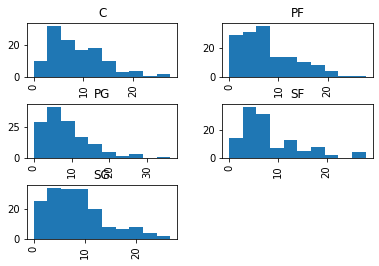

In [255]:
Pos_PTS_df.hist(by=Pos_PTS_df['Pos'])

array([[<AxesSubplot:title={'center':'C'}>,
        <AxesSubplot:title={'center':'PF'}>],
       [<AxesSubplot:title={'center':'PG'}>,
        <AxesSubplot:title={'center':'SF'}>],
       [<AxesSubplot:title={'center':'SG'}>, <AxesSubplot:>]],
      dtype=object)

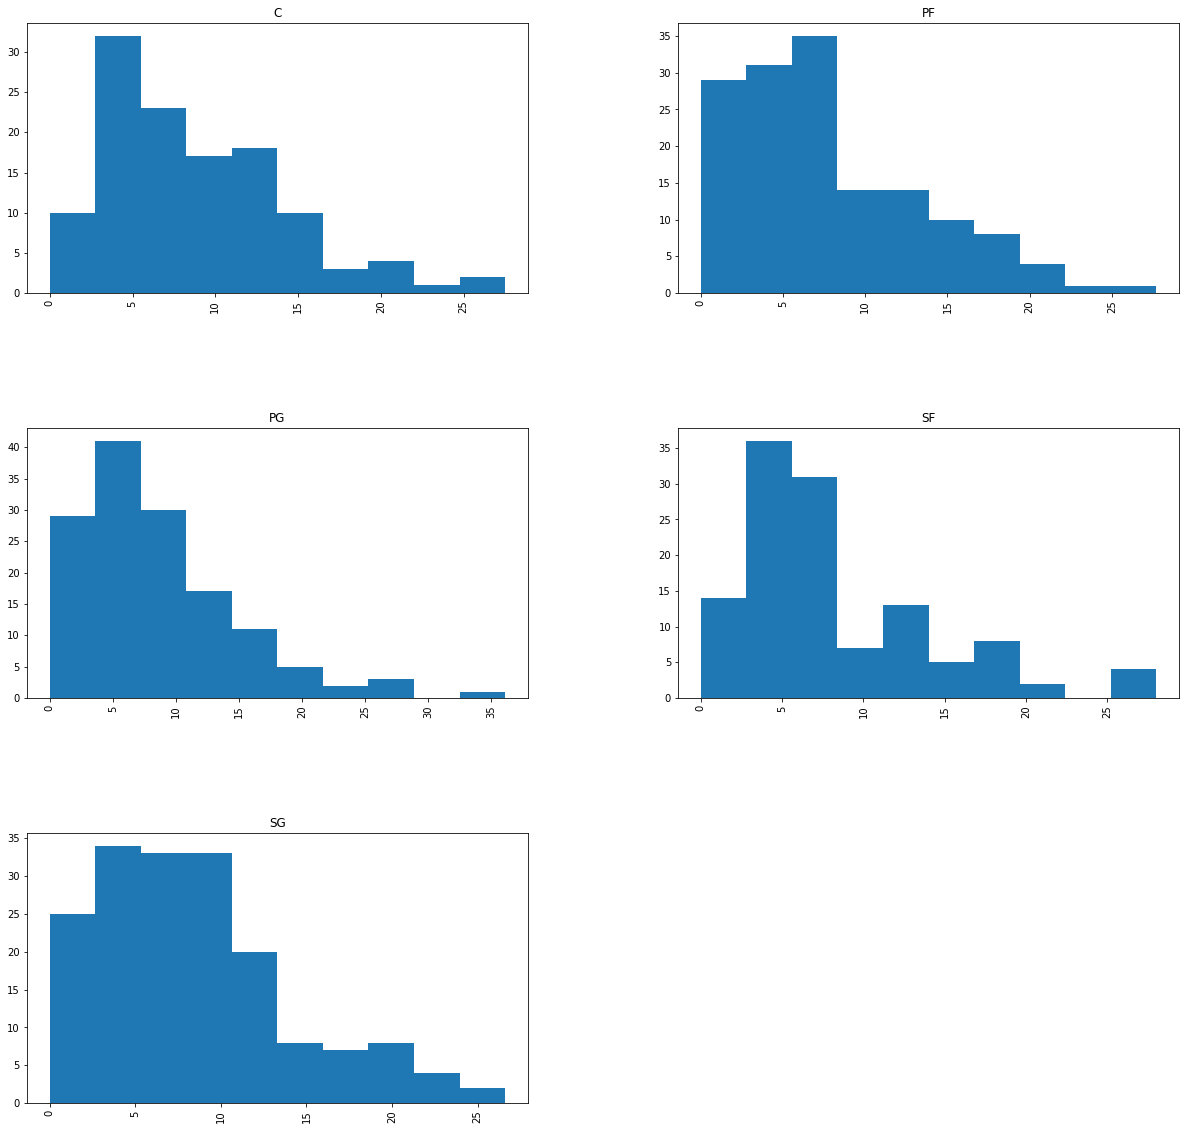

In [256]:
#reshaping the histogram

Pos_PTS_df.hist(by=Pos_PTS_df['Pos'],figsize=(20,20))

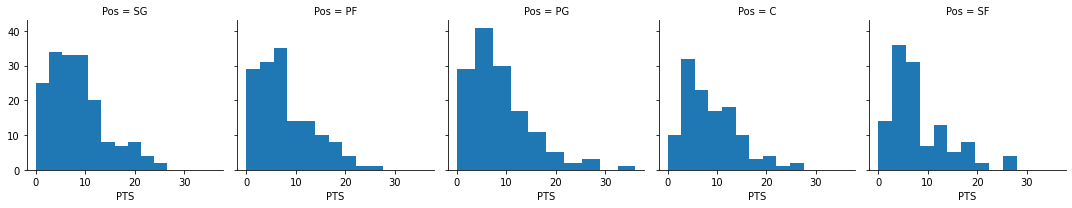

In [257]:
#seaborn visualization
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.FacetGrid(Pos_PTS_df, col="Pos")
g.map(plt.hist, "PTS")
#Pos_PTS_df['Pos'].unique()


# Box plots

## Box plot of points scored (PTS) grouped by Position

<AxesSubplot:title={'center':'PTS'}, xlabel='Pos'>

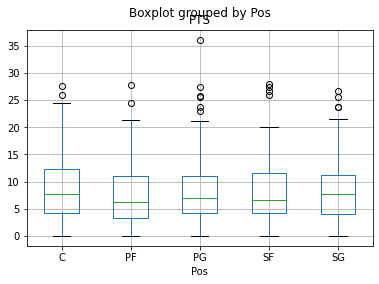

In [258]:
Pos_PTS_df.boxplot(column='PTS', by='Pos')


## Seaborn data visualization

<AxesSubplot:xlabel='Pos', ylabel='PTS'>

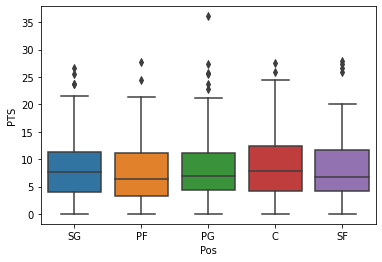

In [259]:
import seaborn as sns

sns.boxplot(x = 'Pos', y = 'PTS', data = Pos_PTS_df)


<AxesSubplot:xlabel='Pos', ylabel='PTS'>

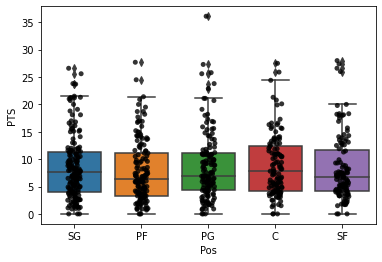

In [260]:
sns.boxplot(x = 'Pos', y = 'PTS', data = Pos_PTS_df) 
sns.stripplot(x = 'Pos', y = 'PTS', data = Pos_PTS_df,
              jitter=True, 
              marker='o',
              alpha=0.8, color="black")

# Heat Map

## Compute the correlation matrix

In [261]:
corr = df.corr()
corr

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Age,1.000000,0.067822,0.040582,0.146543,0.058213,0.073779,0.036927,0.166271,0.159218,0.080328,...,0.171646,-0.016292,0.103831,0.072544,0.141556,0.080757,0.012428,0.063740,0.108226,0.081915
G,0.067822,1.000000,0.641484,0.617229,0.541442,0.521988,0.297932,0.396163,0.376494,0.190439,...,0.419104,0.288914,0.441461,0.421579,0.412688,0.404403,0.338509,0.473385,0.475785,0.534349
GS,0.040582,0.641484,1.000000,0.764661,0.724611,0.711811,0.208333,0.496450,0.485661,0.147906,...,0.267027,0.377497,0.599080,0.567642,0.563876,0.566980,0.424585,0.649941,0.537722,0.720953
MP,0.146543,0.617229,0.764661,1.000000,0.870974,0.892272,0.250899,0.686999,0.693822,0.263535,...,0.454169,0.386490,0.695738,0.642351,0.675725,0.734732,0.438661,0.766357,0.730804,0.875831
FG,0.058213,0.541442,0.724611,0.870974,1.000000,0.973355,0.351566,0.604936,0.600830,0.218206,...,0.371598,0.464378,0.723009,0.687463,0.665761,0.635615,0.460076,0.830099,0.624156,0.990014
FGA,0.073779,0.521988,0.711811,0.892272,0.973355,1.000000,0.209266,0.710099,0.725114,0.254855,...,0.395902,0.331235,0.649522,0.590755,0.703093,0.659276,0.362490,0.832446,0.591815,0.980447
FG%,0.036927,0.297932,0.208333,0.250899,0.351566,0.209266,1.000000,-0.018308,-0.089491,0.171014,...,0.203334,0.452070,0.365379,0.414942,0.106054,0.161195,0.380163,0.214178,0.351862,0.305803
3P,0.166271,0.396163,0.496450,0.686999,0.604936,0.710099,-0.018308,1.000000,0.978692,0.484236,...,0.385127,-0.136075,0.266407,0.156793,0.454015,0.475153,0.025957,0.463594,0.353059,0.669458
3PA,0.159218,0.376494,0.485661,0.693822,0.600830,0.725114,-0.089491,0.978692,1.000000,0.410159,...,0.377633,-0.154240,0.259847,0.146277,0.480880,0.489862,0.022530,0.486354,0.353207,0.666673
3P%,0.080328,0.190439,0.147906,0.263535,0.218206,0.254855,0.171014,0.484236,0.410159,1.000000,...,0.262347,-0.195221,0.045131,-0.027438,0.195202,0.147455,-0.098000,0.132833,0.094418,0.246776


<AxesSubplot:>

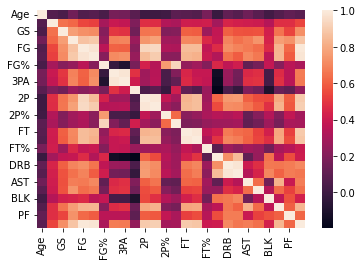

In [262]:
sns.heatmap(corr)

# Adjust figure size of heat map¶


<AxesSubplot:>

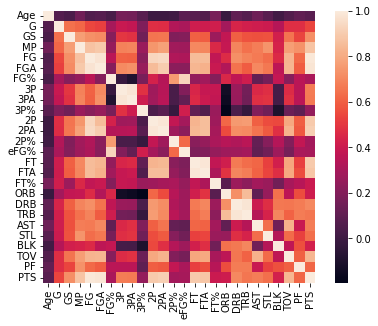

In [263]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(corr, square=True) 

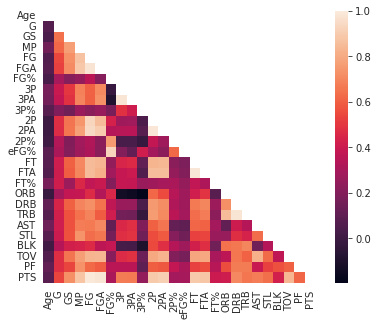

In [264]:
import numpy as np
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True)

# Scatter Plot

In [265]:
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,0.357,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,0.222,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,0.345,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,0.595,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,0.576,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,0.571,...,0.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
704,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,0.553,...,0.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
705,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,0.559,...,0.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
706,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,0.580,...,0.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


In [266]:
# Select columns if they have numerical data types

df.select_dtypes(include=['number'])

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,25,31,2,19.0,1.8,5.1,0.357,1.3,4.1,0.323,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,28,10,0,12.3,0.4,1.8,0.222,0.2,1.5,0.133,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,22,34,1,12.6,1.1,3.2,0.345,0.7,2.2,0.338,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,25,80,80,33.4,6.0,10.1,0.595,0.0,0.0,0.000,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,21,82,28,23.3,3.4,5.9,0.576,0.0,0.2,0.200,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,29,4,1,20.5,4.0,7.0,0.571,0.0,0.0,0.000,...,0.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
704,22,59,25,18.3,3.1,5.6,0.553,0.0,0.0,0.000,...,0.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
705,21,59,37,17.6,3.6,6.4,0.559,0.0,0.0,0.000,...,0.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
706,21,33,12,15.6,3.4,5.8,0.580,0.0,0.0,0.000,...,0.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


## Select the first 5 columns (by index number)

In [267]:

number = df.select_dtypes(include=['number'])

In [268]:
number.iloc[:,:5]

,Age,G,GS,MP,FG
0,25,31,2,19.0,1.8
1,28,10,0,12.3,0.4
2,22,34,1,12.6,1.1
3,25,80,80,33.4,6.0
4,21,82,28,23.3,3.4
...,...,...,...,...,...
703,29,4,1,20.5,4.0
704,22,59,25,18.3,3.1
705,21,59,37,17.6,3.6
706,21,33,12,15.6,3.4


## Select 5 specific columns (by column names)

In [269]:
selections = ['Age', 'G', 'STL', 'BLK', 'AST', 'PTS']
df5 = df[selections]
df5

,Age,G,STL,BLK,AST,PTS
0,25,31,0.5,0.2,0.6,5.3
1,28,10,0.1,0.4,0.8,1.7
2,22,34,0.4,0.1,1.9,3.2
3,25,80,1.5,1.0,1.6,13.9
4,21,82,0.9,0.8,2.2,8.9
...,...,...,...,...,...,...
703,29,4,0.3,0.8,0.8,11.5
704,22,59,0.2,0.4,0.9,7.8
705,21,59,0.2,0.9,1.1,8.9
706,21,33,0.1,0.8,0.8,8.5


## Make scatter plot grid

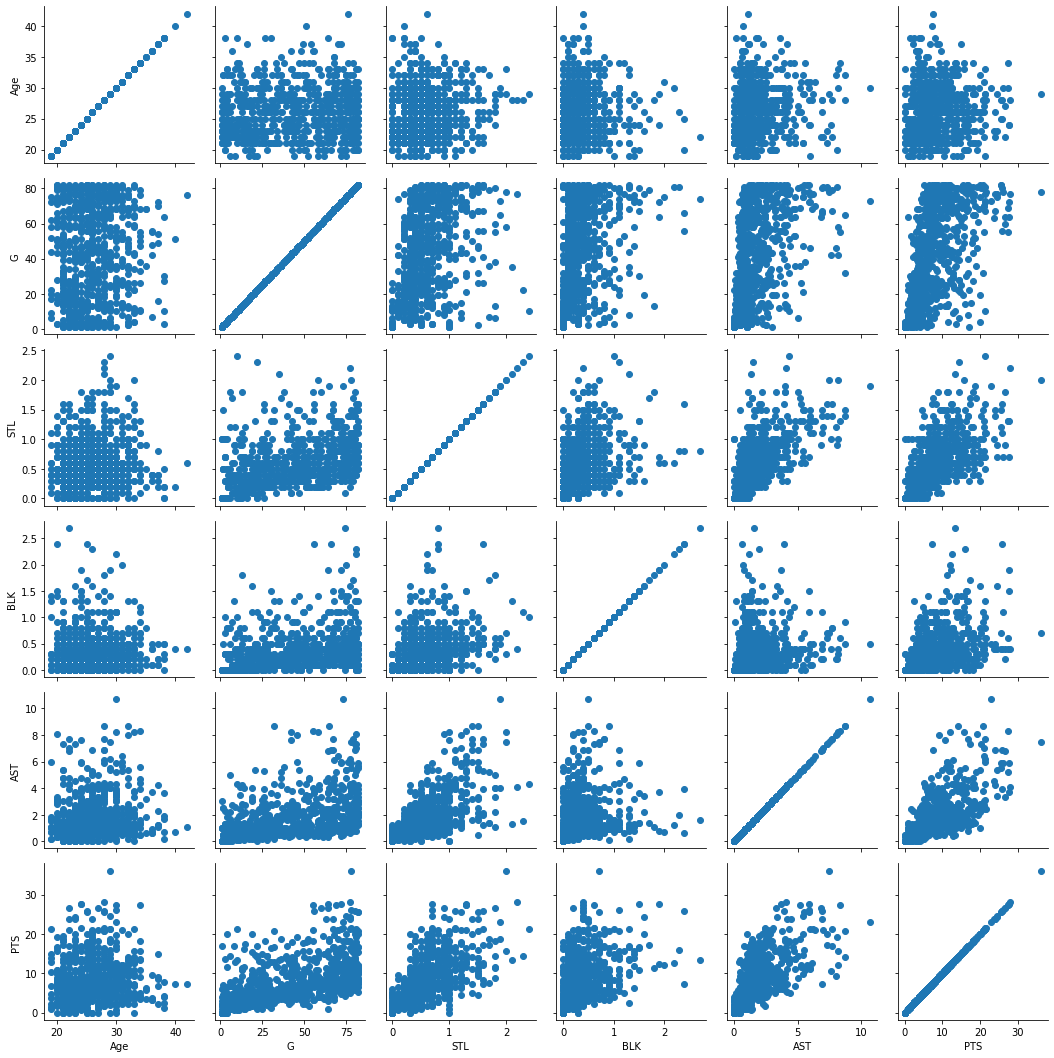

In [270]:
g = sns.PairGrid(df5)
g.map(plt.scatter)

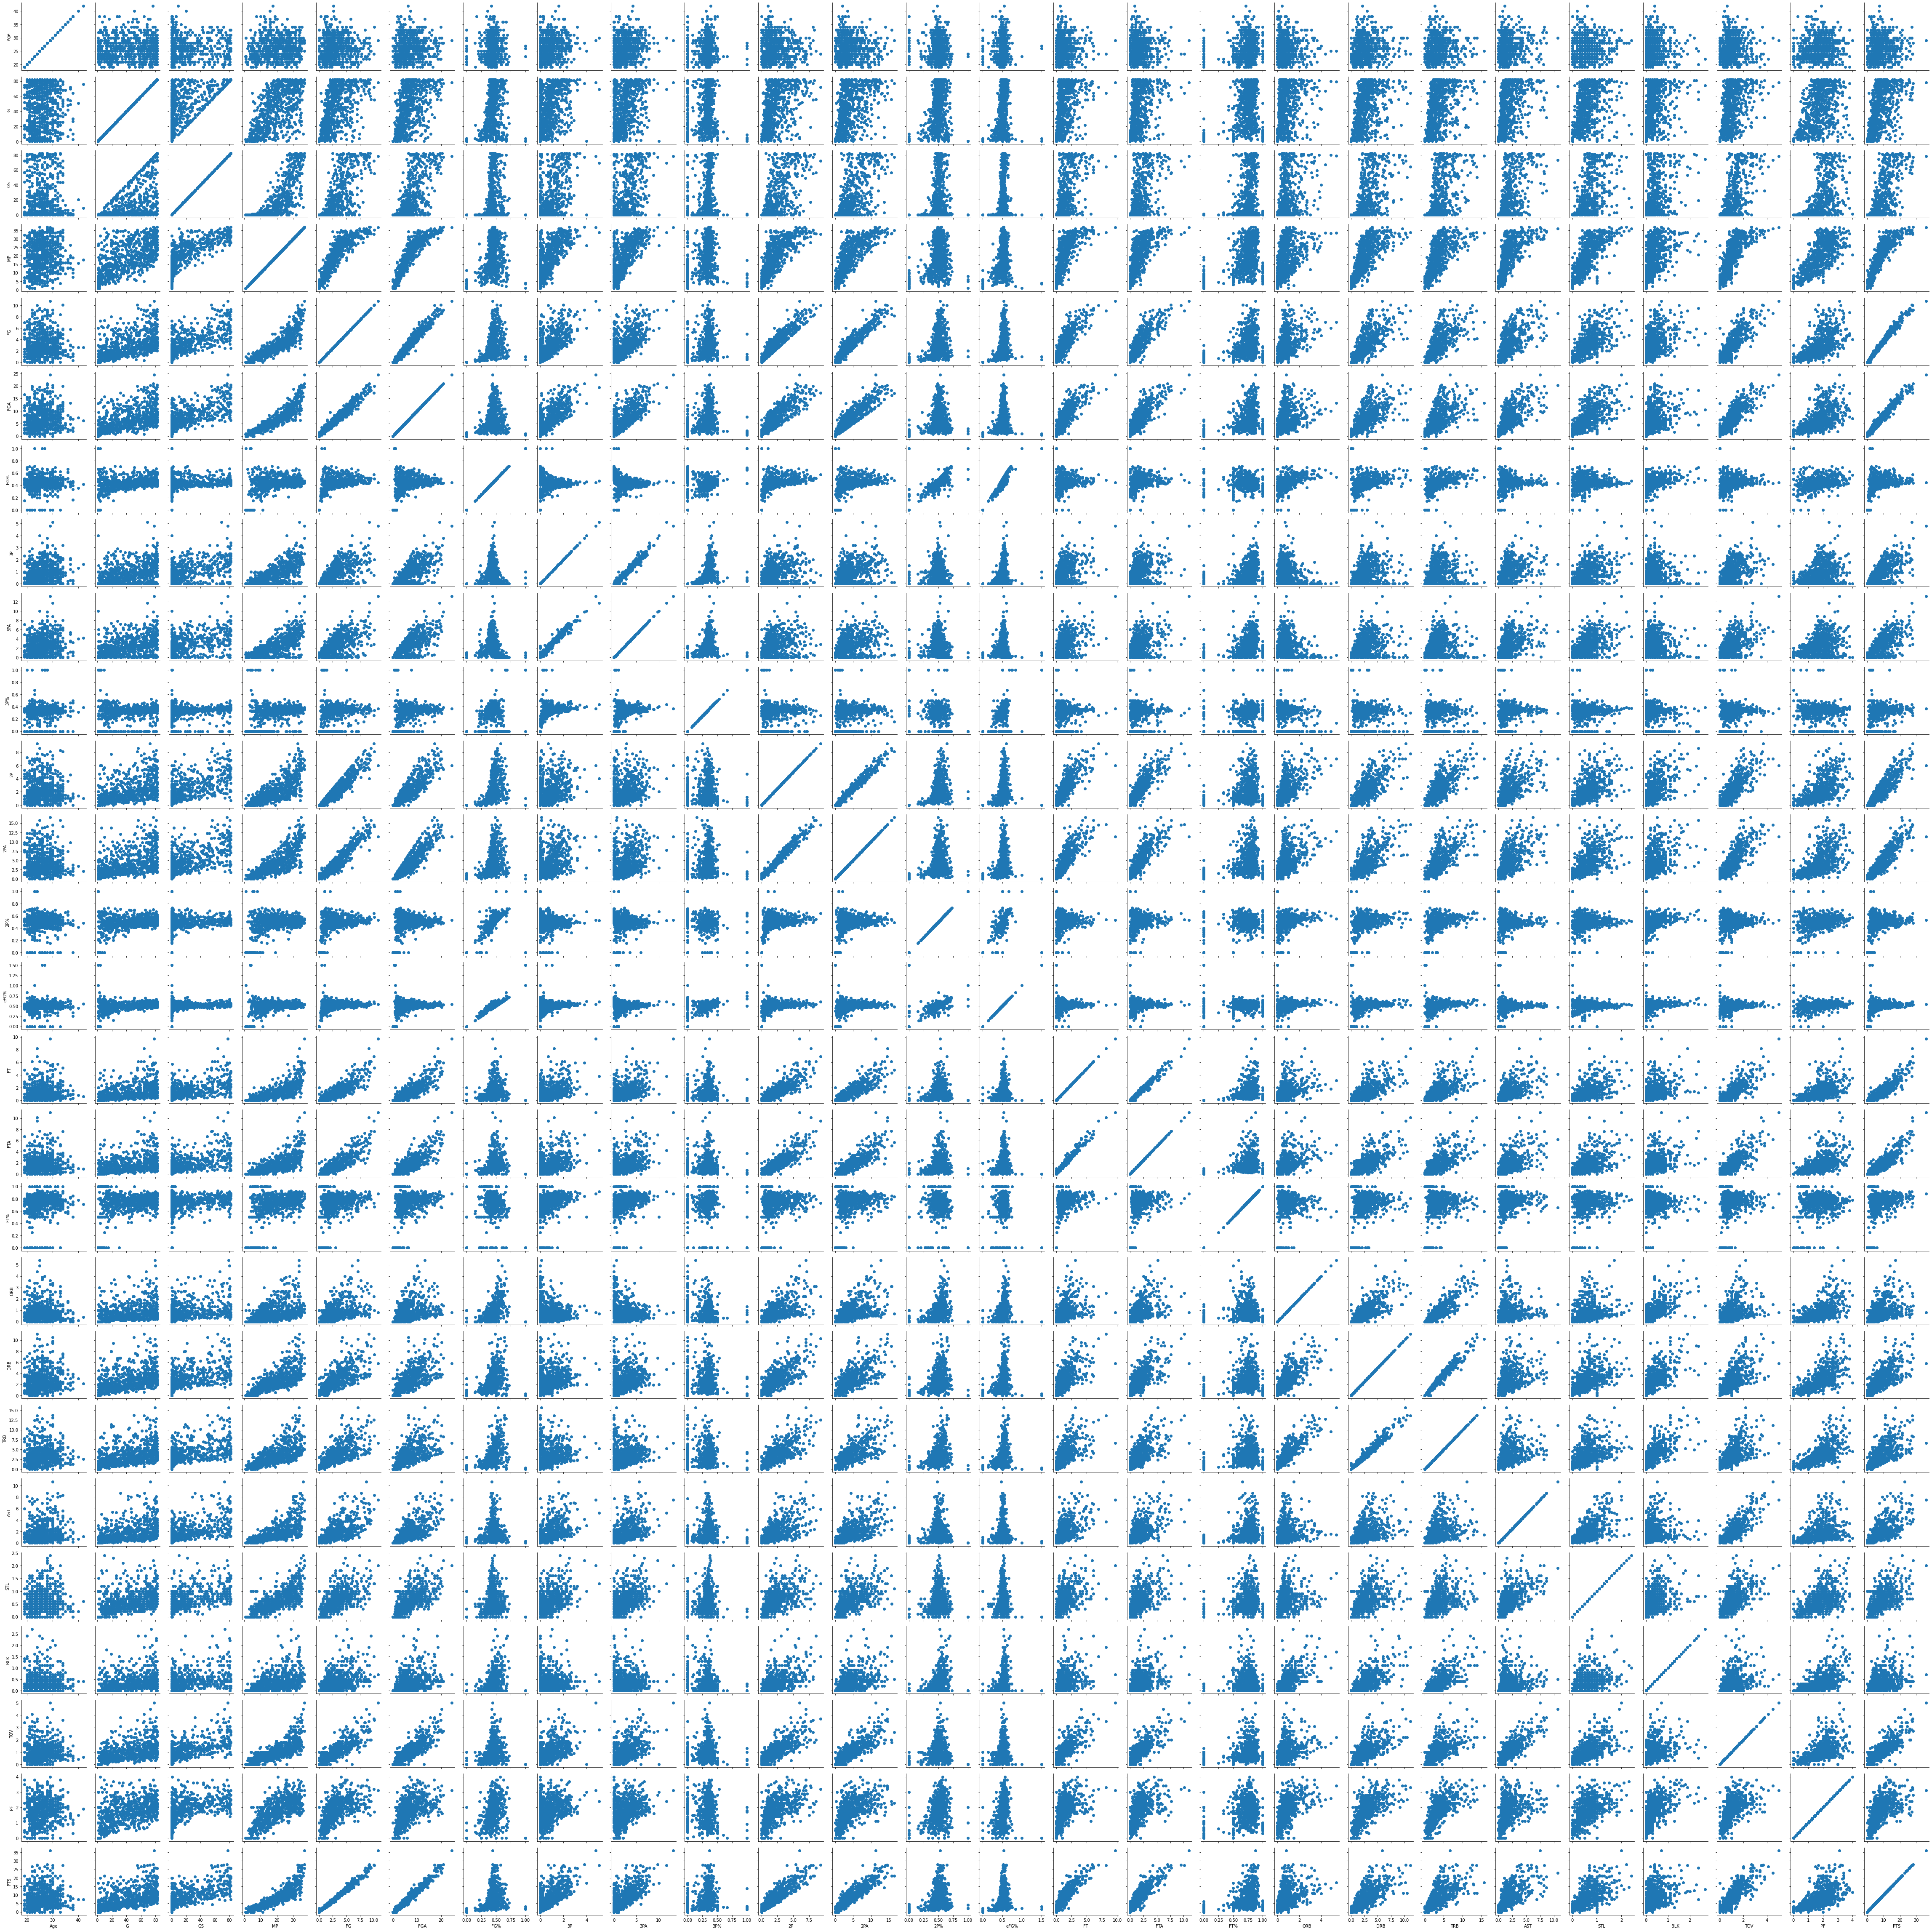

In [271]:
#All columns

g = sns.PairGrid(number)
g.map(plt.scatter)